In [1]:
import pandas as pd
import numpy as np


In [3]:
import numpy as np
import pandas as pd

np.random.seed(42)   # fixed seed

n = 100

# Height in cm (realistic human range)
heights = np.random.normal(loc=170, scale=10, size=n)
heights = np.clip(heights, 145, 195)

# Weight correlated with height + noise
weights = 0.45 * heights - 30 + np.random.normal(0, 5, n)

df = pd.DataFrame({
    "Height": heights.round(1),
    "Weight": weights.round(1)
})

print(df.head())


   Height  Weight
0   175.0    41.7
1   168.6    43.8
2   176.5    47.7
3   185.2    49.3
4   167.7    44.6


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [6]:
df.info

<bound method DataFrame.info of     Height  Weight
0    175.0    41.7
1    168.6    43.8
2    176.5    47.7
3    185.2    49.3
4    167.7    44.6
..     ...     ...
95   155.4    41.8
96   173.0    43.4
97   172.6    48.4
98   170.1    46.8
99   167.7    39.7

[100 rows x 2 columns]>

In [7]:
df.columns


Index(['Height', 'Weight'], dtype='object')

In [8]:
X = df[["Height"]]   # feature (independent)
y = df["Weight"]    # target (dependent)


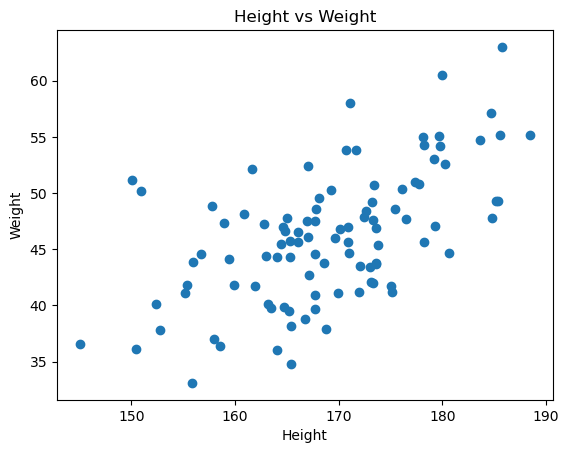

In [9]:
plt.scatter(X, y)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height vs Weight")
plt.show()


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [11]:
m = model.coef_[0]
c = model.intercept_

print("Slope (m):", m)
print("Intercept (c):", c)


NameError: name 'model' is not defined

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [13]:
m = model.coef_[0]
c = model.intercept_

print("Slope (m):", m)
print("Intercept (c):", c)


Slope (m): 0.37843105869637905
Intercept (c): -17.75693475617979


In [14]:
y_pred = model.predict(X_test)


In [15]:
model.predict([[170]])


E:\D\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([46.57634522])

In [16]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)


MSE: 21.85707682730895
RMSE: 4.675155273069436
R2: 0.2841086123226445


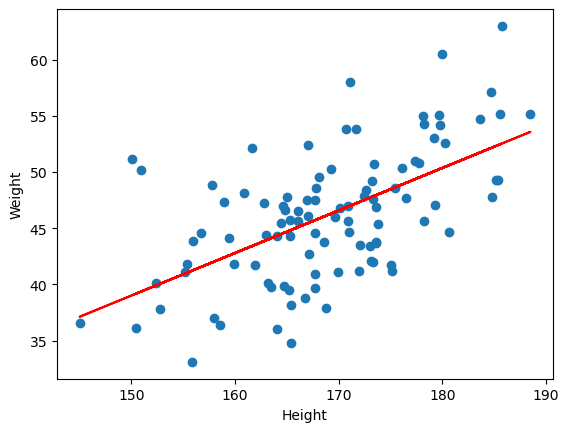

In [17]:
plt.scatter(X, y)
plt.plot(X, model.predict(X), color="red")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()
